# APEX-MODFLOW Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/apexmf_git/apexmf_pkgs')


In [3]:
import apexmf_pst_viz

# Set Path

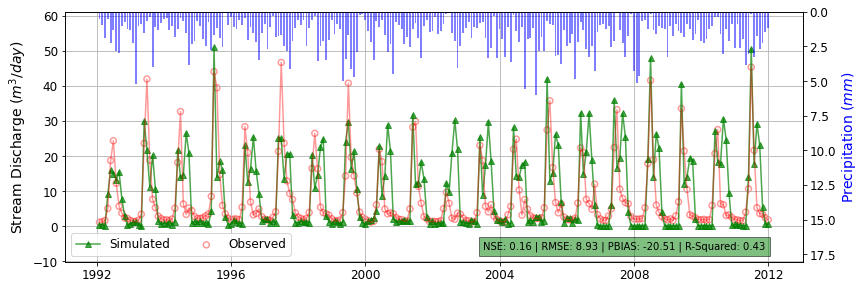

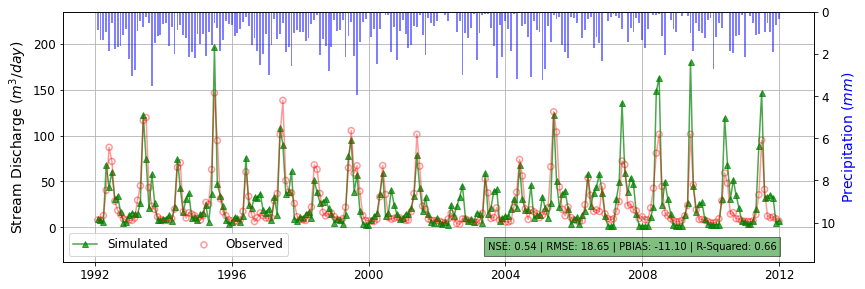

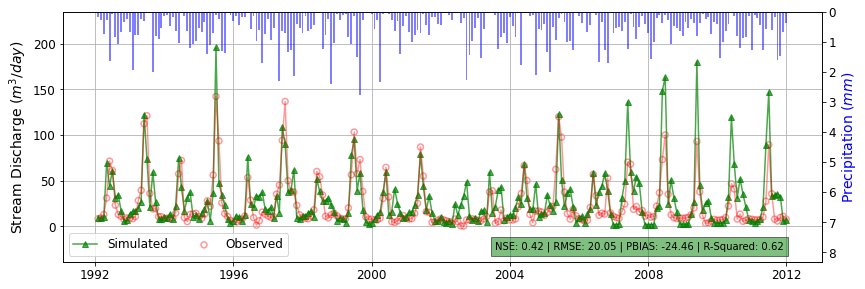

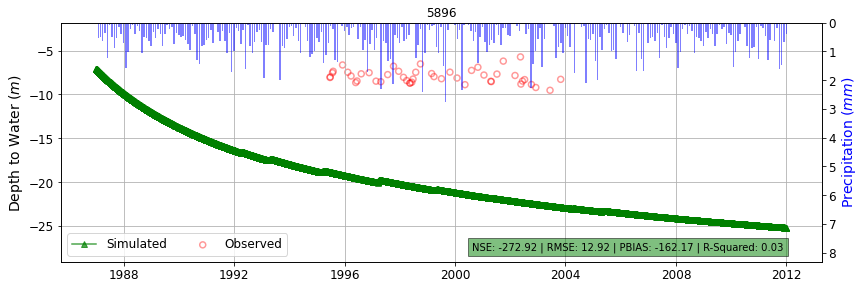

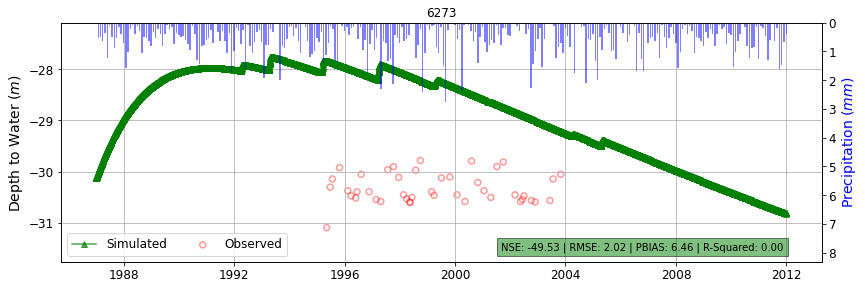

In [68]:
wd = "D:/Projects/Watersheds/Animas/Analysis/APEX-MODFLOWs/calibrations/v03-01/"
# wd = "D:/Projects/Watersheds/Animas/Analysis/APEX-MODFLOWs/calibrations/qam_test/man_adjust_k02"
os.chdir(wd)
str_dic = {12:'str_012', 57:'str_057', 75:'str_075'}
for sim, obd in str_dic.items():
    pdf = apexmf_pst_viz.str_df('SITE75.RCH', '1/1/1987', sim, obd, time_step='M')
    apexmf_pst_viz.str_plot(pdf['1/1/1992':'12/31/2011'])
    # apexmf_pst_viz.str_plot(pdf['1/1/2012':'12/31/2019']) 
mf_dic = {5896:'gw_124', 6273:'gw_098'}
for sim, obd in mf_dic.items():
    mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
    apexmf_pst_viz.wt_plot(mfdf['1/1/1987':'12/31/2019'])
    # apexmf_pst_viz.wt_plot(mfdf['1/1/2000':'12/31/2005'])
# warm_grids = [3237, 3770, 4373, 5128, 5290, 5653, 6351, 7633]
# warm_obds = ['gw_162', 'gw_160', 'gw_157', 'gw_148', 'gw_144', 'gw_129', 'gw_096', 'gw_026']
# warm_dic = dict(zip(warm_grids, warm_obds))
# for sim, obd in warm_dic.items():
#     mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
#     apexmf_pst_viz.wt_plot(mfdf['1/1/1987':'12/31/2019'])

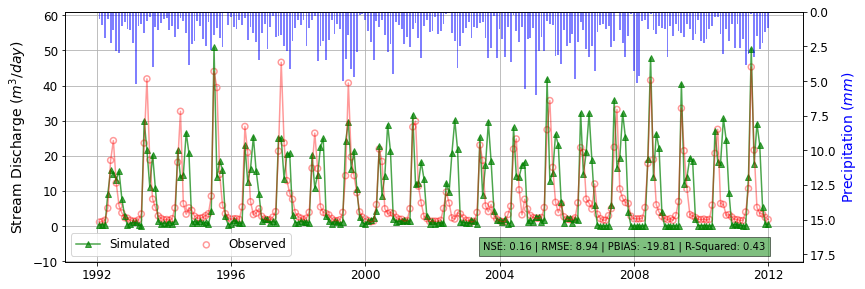

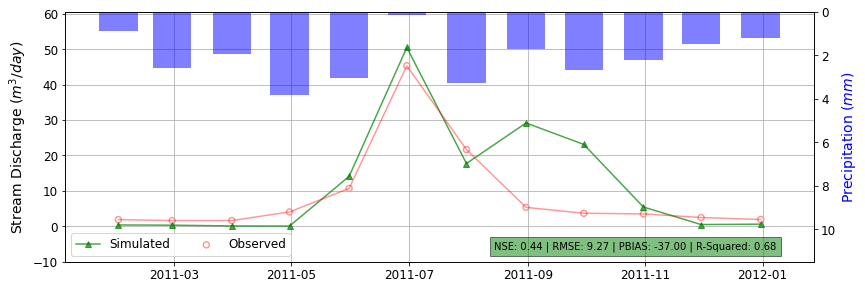

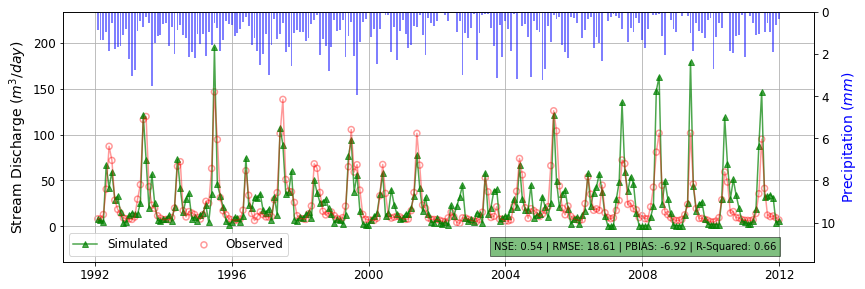

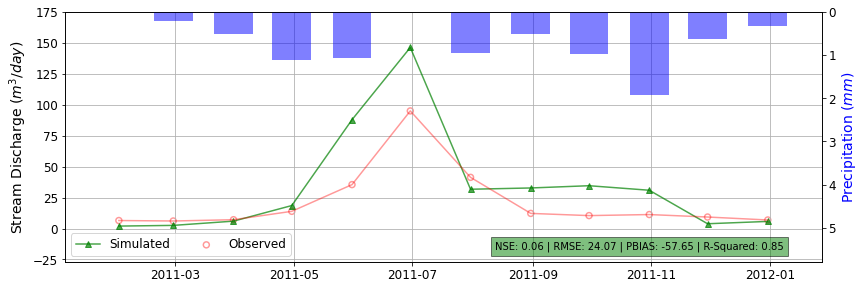

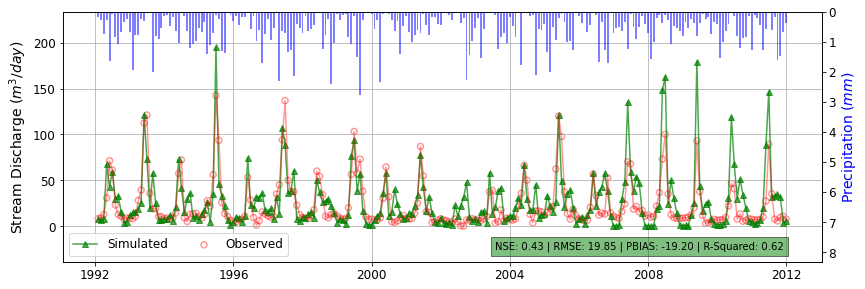

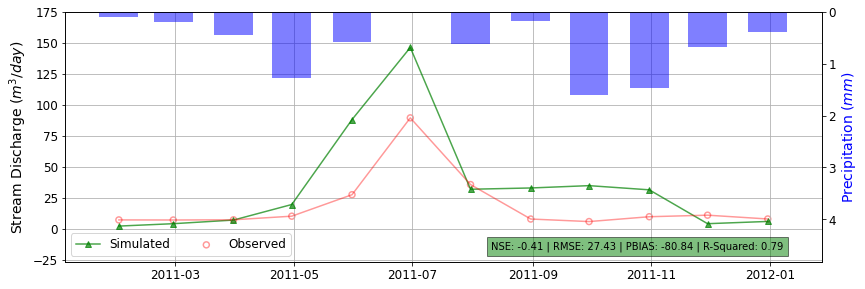

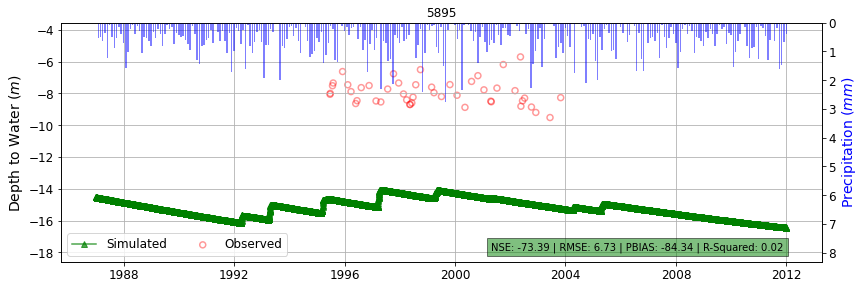

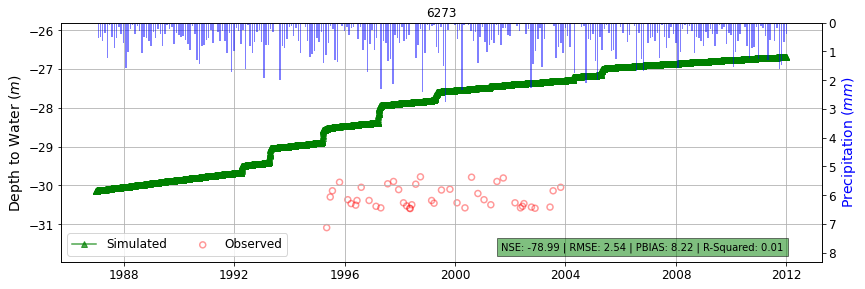

In [65]:
wd = "D:/Projects/Watersheds/Animas/Analysis/APEX-MODFLOWs/calibrations/v03-01"
os.chdir(wd)
str_dic = {12:'str_012', 57:'str_057', 75:'str_075'}
for sim, obd in str_dic.items():
    pdf = apexmf_pst_viz.str_df('SITE75.RCH', '1/1/1987', sim, obd, time_step='M')
    apexmf_pst_viz.str_plot(pdf['1/1/1992':'12/31/2011'])
    apexmf_pst_viz.str_plot(pdf['1/1/2011':'12/31/2019']) 
mf_dic = {5895:'gw_124', 6273:'gw_098'}
for sim, obd in mf_dic.items():
    mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
    # apexmf_pst_viz.wt_plot(mfdf['1/1/1987':'12/31/1999'])
    apexmf_pst_viz.wt_plot(mfdf['1/1/1987':'12/31/2019'])
# warm_grids = [3237, 3770, 4373, 5128, 5290, 5653, 6351, 7633]
# warm_obds = ['gw_162', 'gw_160', 'gw_157', 'gw_148', 'gw_144', 'gw_129', 'gw_096', 'gw_026']
# warm_dic = dict(zip(warm_grids, warm_obds))
# for sim, obd in warm_dic.items():
#     mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
#     apexmf_pst_viz.wt_plot(mfdf['1/1/1987':'12/31/1987'])

In [15]:


pdf = apexmf_pst_viz.str_df('SITE75.RCH', '1/1/1980', 12, 'str_012', time_step='M')


In [23]:
pdf

,simulated,str_012,prep
1980-01-31,1.6540,NaN,42.9
1980-02-29,1.2970,NaN,64.3
1980-03-31,1.2500,NaN,107.8
1980-04-30,4.6730,NaN,20.4
1980-05-31,28.1700,NaN,33.8
...,...,...,...
1999-08-31,19.4000,14.36,146.9
1999-09-30,11.7900,9.51,88.0
1999-10-31,3.2410,4.04,6.4
1999-11-30,1.5120,2.56,5.1


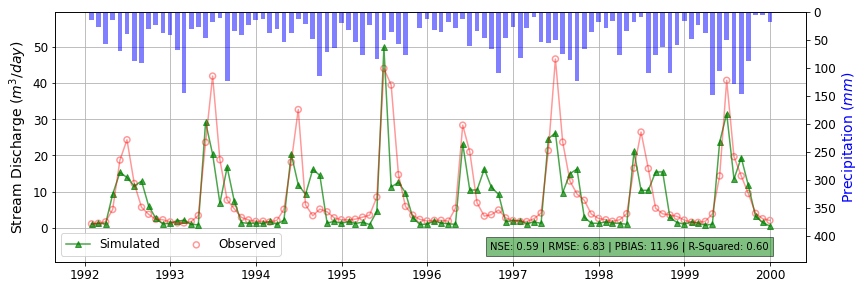

In [24]:
apexmf_pst_viz.str_plot(pdf['1/1/1992':'12/31/1999'])

### 1. Plot for Sim vs Obd

In [4]:
obd_df = apexmf_pst_viz.obds_df('streamflow_month.obd', 'modflow.obd')
obd_df

,str_012,str_057,str_072,str_075,sed_012,sed_057,sed_072,sed_075,gw_026,gw_096,...,wt_gw_162,wt_gw_160,wt_gw_157,wt_gw_148,wt_gw_144,wt_gw_129,wt_gw_124,wt_gw_098,wt_gw_096,wt_gw_026
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,10.16,25.45,19.23,18.18,48.02,249.75,160.72,148.77,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,3.64,11.53,7.01,6.70,6.61,53.18,21.54,20.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-31,2.14,8.24,6.67,6.82,2.48,28.69,19.90,20.77,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-30,1.65,7.09,7.13,8.26,1.54,22.03,22.22,29.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
obd_str = obd_df[['str_012', 'str_057', 'str_072', 'str_075']]
obd_sed = obd_df[['sed_012', 'sed_057', 'sed_072', 'sed_075']]
obd_wt = obd_df.iloc[:, 8:18]

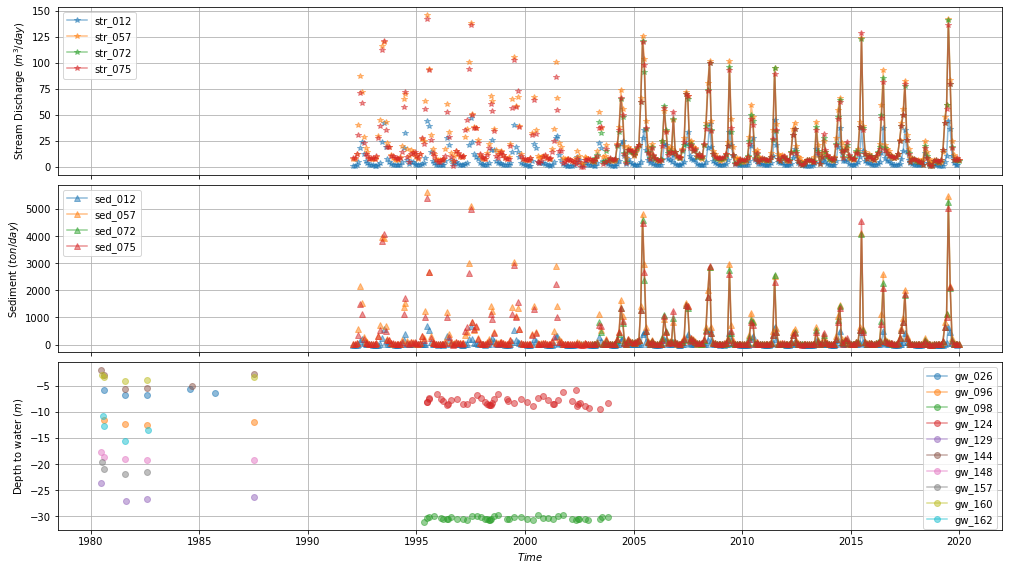

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
axes[0].plot(obd_df.index, obd_str, '-*', alpha=0.5)
axes[1].plot(obd_df.index, obd_sed, '-^', alpha=0.5)
axes[2].plot(obd_df.index, obd_wt, '-o', alpha=0.5)
axes[0].set_ylabel("Stream Discharge $(m^3/day)$",fontsize=10)
axes[1].set_ylabel("Sediment $(ton/day)$",fontsize=10)
axes[2].set_ylabel("Depth to water $(m)$",fontsize=10)
axes[2].set_xlabel("$Time$",fontsize=10)



axes[0].legend(obd_str.columns.tolist(), fontsize=10)
axes[1].legend(obd_sed.columns.tolist(), fontsize=10)
axes[2].legend(obd_wt.columns.tolist(), fontsize=10)
for ax in axes:
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()
plt.show()